In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
np.set_printoptions(precision=2)

In [62]:
dataset_path = r'F:\Pedro\2023\Courses\Supervised Machine Learning Regression and Classification\Week 2\Codes\House_Pricing_Data.xlsx'

In [63]:
dataset = pd.read_excel(dataset_path)
house_price_df = pd.DataFrame(dataset)
m = len(house_price_df.columns)
X_train = house_price_df[['size(sqft)', 'bedrooms', 'floors', 'age']].to_numpy()
y_train = house_price_df.iloc[:, m-1].values

In [64]:
scaler = StandardScaler()
X_norm= scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2406    4    1   95]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


In [65]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 140, number of weight updates: 13861.0


In [66]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                  w: {w_norm}, b: {b_norm}")
print(f"model parameters from pevious lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                  w: [110.27 -21.17 -32.6  -38.  ], b: [363.14]
model parameters from pevious lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


In [67]:
y_pred_sgd = sgdr.predict(X_norm)
y_pred = np.dot(X_norm, w_norm) + b_norm
print(f"Prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")
print(f"Prediction on training set:\n{y_pred[:4]}")
print(f"Target values \n{y_train[:4]}")

Prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.21 485.81 389.48 491.97]
Target values 
[300.  509.8 394.  540. ]


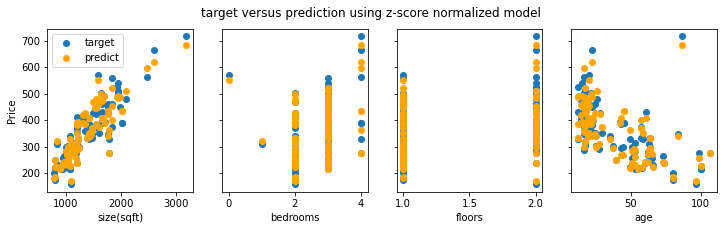

In [71]:
X_features = ['size(sqft)','bedrooms','floors','age']
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,c='orange', label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()